In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


# 1 Linear Regression

In [ ]:
carTrain = pd.read_csv('/content/drive/MyDrive/carseats_train.csv')
carTest = pd.read_csv('/content/drive/MyDrive/carseats_test.csv')

carTrain.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
1,13.91,110,110,0,408,68,Good,46,17,No,Yes
2,4.10,121,78,4,413,130,Bad,46,10,No,Yes
3,9.16,137,105,10,435,156,Good,72,14,Yes,Yes
4,7.22,135,93,2,67,119,Medium,34,11,Yes,Yes


In [ ]:
carTest.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.02,98,21,11,326,90,Bad,76,11,No,Yes
1,2.86,121,86,10,496,145,Bad,51,10,Yes,Yes
2,8.77,114,38,13,317,128,Good,50,16,Yes,Yes
3,4.36,125,41,2,357,123,Bad,47,14,No,Yes
4,8.86,145,30,0,67,104,Medium,55,17,Yes,No


In [ ]:
#----- BINARY ENCODING --------

carTest['US'].replace('Yes', 1, inplace=True)
carTest['US'].replace('No', 0, inplace=True)

carTrain['US'].replace('Yes', 1, inplace=True)
carTrain['US'].replace('No', 0, inplace=True)

carTest['Urban'].replace('Yes', 1, inplace=True)
carTest['Urban'].replace('No', 0, inplace=True)

carTrain['Urban'].replace('Yes', 1, inplace=True)
carTrain['Urban'].replace('No', 0, inplace=True)

carTrain_labels = carTrain["Sales"]
carTest_labels = carTest["Sales"]

carTrain_features = carTrain.drop(columns=['Sales'])
carTest_features = carTest.drop(columns=['Sales'])

In [ ]:
#----- ONE HOT ENCODING --------

carTrain_features = pd.get_dummies(carTrain_features, columns = ['ShelveLoc'])
carTest_features = pd.get_dummies(carTest_features, columns = ['ShelveLoc'])

carTrain_features.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,117,100,4,466,97,55,14,1,1,0,0,1
1,110,110,0,408,68,46,17,0,1,0,1,0
2,121,78,4,413,130,46,10,0,1,1,0,0
3,137,105,10,435,156,72,14,1,1,0,1,0
4,135,93,2,67,119,34,11,1,1,0,0,1


In [ ]:
carTrain_features.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,124.634375,68.212500,6.509375,271.646875,116.121875,53.321875,13.825000,0.700000,0.634375,0.240625,0.200000,0.559375
std,15.493170,28.496579,6.630407,145.180691,23.594022,16.453587,2.596236,0.458975,0.482359,0.428132,0.400626,0.497240
min,85.000000,21.000000,0.000000,10.000000,49.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,42.000000,0.000000,148.000000,100.750000,39.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,124.000000,68.000000,5.000000,281.000000,116.500000,55.000000,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,134.000000,92.000000,12.000000,402.000000,131.000000,66.000000,16.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#----- FEATURE STANDARDIZATION -------


def meanColumns(df):
  means = []
  for column in df:
    means.append(df[column].mean())
  return means

def varianceColumns(df):
  variances = []
  for column in df:
    variances.append(df[column].var()**0.5)
  return variances

trainMeans = meanColumns(carTrain_features)
trainVars = varianceColumns(carTrain_features)

print(trainMeans)


for column in carTrain_features.iloc[:, :7]: #only the continous variables, not binary ones
    index = carTrain_features.columns.get_loc(column)
    mean = trainMeans[index]
    var = trainVars[index]
    print(mean,var)
    carTrain_features[column] = carTrain_features[column] - mean
    carTrain_features[column] = carTrain_features[column] / var

for column in carTest_features.iloc[:, :7]:
    index = carTest_features.columns.get_loc(column)
    mean = trainMeans[index]
    var = trainVars[index]
    carTest_features[column] = carTrain_features[column] - mean
    carTest_features[column] = carTrain_features[column] / var

carTrain_features.head()

[124.634375, 68.2125, 6.509375, 271.646875, 116.121875, 53.321875, 13.825, 0.7, 0.634375, 0.240625, 0.2, 0.559375]
124.634375 15.493169885074336
68.2125 28.496579017032577
6.509375 6.6304067958909485
271.646875 145.18069053963154
116.121875 23.594022333851473
53.321875 16.453586937781143
13.825 2.5962355192611772


,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,-0.492757,1.115485,-0.378465,1.338698,-0.810454,0.101991,0.067405,1,1,0,0,1
1,-0.944569,1.466404,-0.981746,0.939196,-2.039579,-0.445002,1.222924,0,1,0,1,0
2,-0.234579,0.343462,-0.378465,0.973636,0.588205,-0.445002,-1.473287,0,1,1,0,0
3,0.798134,1.290944,0.526457,1.125171,1.690179,1.135201,0.067405,1,1,0,1,0
4,0.669045,0.869841,-0.680105,-1.409601,0.121985,-1.174326,-1.088114,1,1,0,0,1


In [ ]:
#DOUBLE CHECKING WITH THE STANDARD SCALER TO SEE IF THE ANSWER ABOVE IS CORRECT

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(carTrain_features.iloc[:, :7] )
df_std = std_scale.transform(carTrain_features.iloc[:, :7])

print(df_std)

[[-0.4935292   1.11723181 -0.37905745 ... -0.81172353  0.10215117
   0.06751086]
 [-0.94604881  1.46870073 -0.98328353 ... -2.04277344 -0.4456987
   1.2248398 ]
 [-0.23494657  0.3440002  -0.37905745 ...  0.58912636 -0.4456987
  -1.47559441]
 ...
 [-0.36423788 -1.48363816 -0.98328353 ... -1.15132351 -1.66314287
  -1.47559441]
 [ 0.47615568  1.1875256   2.03784685 ... -0.38722356 -0.26308208
  -1.08981809]
 [-0.75211183 -1.62422572 -0.98328353 ... -0.81172353  0.71087326
   0.83906349]]


# Stochastic Gradient Descent

**If an epoch means we will visit every data then for one epoch we should have a step size of 1000 and visit every point. For 2 epochs, 1000*2 = 2000 steps**

In [ ]:
import numpy as np

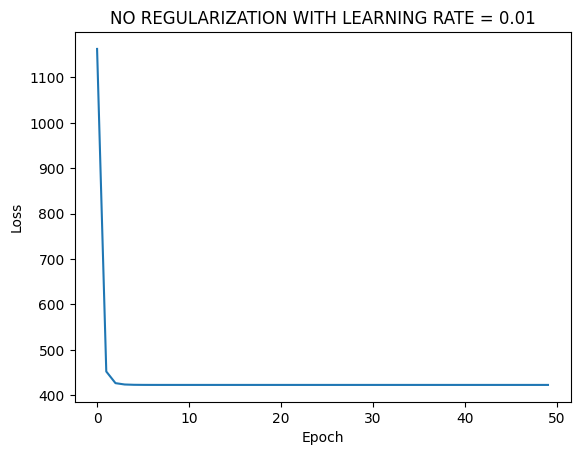

In [ ]:
#NO REGULARIZATION WITH LEARNING RATE = 0.01


slopesNoReg1 = np.zeros(12)
interceptNoReg1 = 0


learningR = 0.01

lossesNoReg1 = []
for i in range(50):
  totalLoss = 0
  for index,row in carTrain_features.iterrows():
    row = row.values

    actualValue = carTrain_labels.iloc[index]
    prediction = sum(np.multiply(slopesNoReg1,row)) + interceptNoReg1
    loss  = (prediction-actualValue)**2
    for column in range(len(row)):
      slopesNoReg1[column] -= (prediction-actualValue)*2*learningR*row[column]
      interceptNoReg1 -= (prediction-actualValue)*2*learningR

    totalLoss += loss
  lossesNoReg1.append(totalLoss)


plt.plot(lossesNoReg1)

plt.title("NO REGULARIZATION WITH LEARNING RATE = 0.01")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()


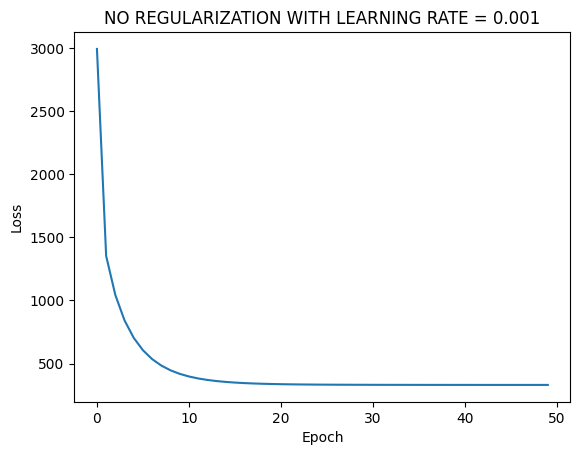

In [ ]:
#NO REGULARIZATION WITH LEARNING RATE = 0.001


slopesNoReg2 = np.zeros(12)
interceptNoReg2 = 0


learningR = 0.001

lossesNoReg2 = []
for i in range(50):
  totalLoss = 0
  for index,row in carTrain_features.iterrows():
    row = row.values

    actualValue = carTrain_labels.iloc[index]
    prediction = sum(np.multiply(slopesNoReg2,row)) + interceptNoReg2
    loss  = (prediction-actualValue)**2
    for column in range(len(row)):
      slopesNoReg2[column] -= (prediction-actualValue)*2*learningR*row[column]
      interceptNoReg2 -= (prediction-actualValue)*2*learningR

    totalLoss += loss
  lossesNoReg2.append(totalLoss)


plt.plot(lossesNoReg2)


plt.title("NO REGULARIZATION WITH LEARNING RATE = 0.001")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()


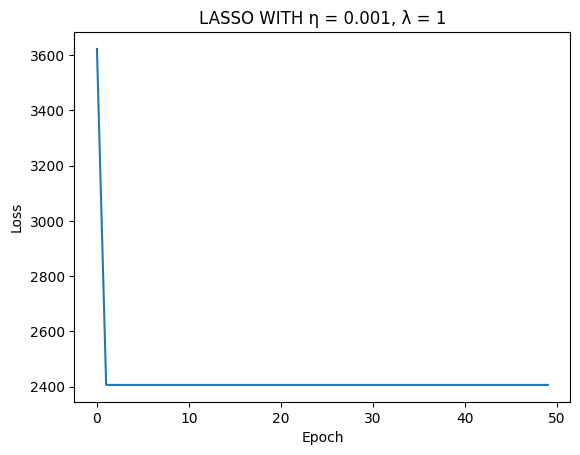

In [ ]:
#L1 regularization, η = 0.001, λ = 1


slopesLas1 = np.zeros(12)
interceptLas1 = 0


lmdaLas1 = 1
learningR = .001

lossesLas1 = []
for i in range(50):
  totalLoss = 0
  for index,row in carTrain_features.iterrows():
    row = row.values

    actualValue = carTrain_labels.iloc[index]
    prediction = (sum(np.multiply(slopesLas1,row)) + interceptLas1)

    loss  = (prediction-actualValue)**2 + (sum(slopesLas1)*lmdaLas1)
    for column in range(len(row)):
      slopesLas1[column] -= (prediction-actualValue)*2*learningR*row[column] + (slopesLas1[column]*lmdaLas1)
      interceptLas1 -= (prediction-actualValue)*2*learningR

    totalLoss += loss
  lossesLas1.append(totalLoss)


plt.plot(lossesLas1)


plt.title("LASSO WITH η = 0.001, λ = 1")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()


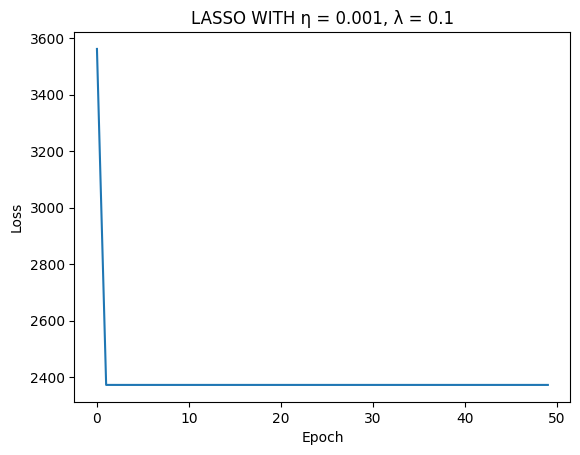

In [ ]:
#L1 regularization, η = 0.001, λ = .1


slopesLas2 = np.zeros(12)
interceptLas2 = 0


lmdaLas2 = .1
learningR = .001

lossesLas2 = []
for i in range(50):
  totalLoss = 0
  for index,row in carTrain_features.iterrows():
    row = row.values

    actualValue = carTrain_labels.iloc[index]
    prediction = sum(np.multiply(slopesLas2,row)) + interceptLas2
    loss  = (prediction-actualValue)**2 + (sum(slopesLas2)*lmdaLas2)
    for column in range(len(row)):
      slopesLas2[column] -= (prediction-actualValue)*2*learningR*row[column] + (slopesLas2[column]*lmdaLas2)
      interceptLas2 -= (prediction-actualValue)*2*learningR

    totalLoss += loss
  lossesLas2.append(totalLoss)


plt.plot(lossesLas2)

plt.title("LASSO WITH η = 0.001, λ = 0.1")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

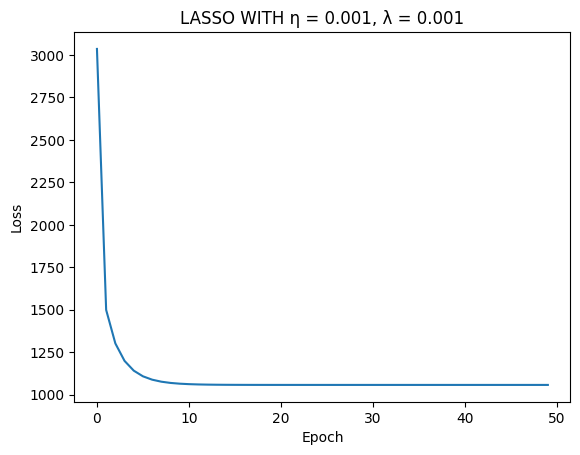

In [ ]:
#L1 regularization, η = 0.001, λ = .001


slopesLas3 = np.zeros(12)
interceptLas3 = 0


lmdaLas3 = .001
learningR = .001

lossesLas3 = []
for i in range(50):
  totalLoss = 0
  for index,row in carTrain_features.iterrows():
    row = row.values

    actualValue = carTrain_labels.iloc[index]
    prediction = sum(np.multiply(slopesLas3,row)) + interceptLas3
    loss  = (prediction-actualValue)**2 + (sum(slopesLas3)*lmdaLas3)
    for column in range(len(row)):
      slopesLas3[column] -= (prediction-actualValue)*2*learningR*row[column] + (slopesLas3[column]*lmdaLas3)
      interceptLas3 -= (prediction-actualValue)*2*learningR

    totalLoss += loss
  lossesLas3.append(totalLoss)


plt.plot(lossesLas3)

plt.title("LASSO WITH η = 0.001, λ = 0.001")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

Log Lambdas: [0.0, -2.3025850929940455, -6.907755278982137]


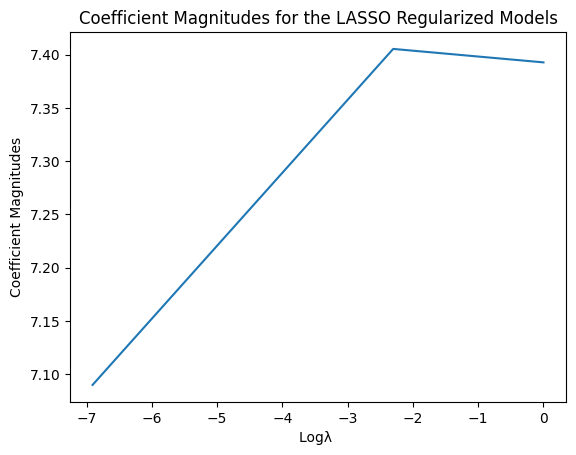

In [ ]:
import math

coefMag1 =  abs(sum(slopesLas1) + interceptLas1 )
coefMag2 =  abs(sum(slopesLas2) + interceptLas2 )
coefMag3 =  abs(sum(slopesLas3) + interceptLas3 )

coefMags = [coefMag1,coefMag2,coefMag3]
lambdas = [math.log(lmdaLas1),math.log(lmdaLas2),math.log(lmdaLas3)]

print("Log Lambdas:" , lambdas)

plt.plot(lambdas,coefMags)

plt.title("Coefficient Magnitudes for the LASSO Regularized Models")
plt.xlabel("Logλ ")
plt.ylabel("Coefficient Magnitudes")

plt.show()

# Evaluation

In [ ]:
lossNoReg1 = 0
for index,row in carTest_features.iterrows():
  row = row.values

  actualValue = carTest_labels.iloc[index]
  prediction = sum(np.multiply(slopesNoReg1,row)) + interceptNoReg1
  lossNoReg1  += (prediction-actualValue)**2

lossNoReg1 = format(lossNoReg1,'.5f')
print("No Regularization, Rate  0.01:", lossNoReg1)

No Regularization, Rate  0.01: 548.17443


In [ ]:
lossNoReg2 = 0
for index,row in carTest_features.iterrows():
  row = row.values

  actualValue = carTest_labels.iloc[index]
  prediction = sum(np.multiply(slopesNoReg2,row)) + interceptNoReg2
  lossNoReg2  += (prediction-actualValue)**2

lossNoReg2 = format(lossNoReg2,'.5f')
print("No Regularization, Rate  0.001:",lossNoReg2)

No Regularization, Rate  0.001: 469.99708


In [ ]:
lossLas1 = 0
for index,row in carTest_features.iterrows():
  row = row.values

  actualValue = carTest_labels.iloc[index]
  prediction = sum(np.multiply(slopesLas1,row)) + interceptLas1
  lossLas1  += (prediction-actualValue)**2

lossLas1 = float(format(lossLas1,'.5f'))
print("Lasso Regularization, Rate  0.001 and λ=1:",lossLas1)

Lasso Regularization, Rate  0.001 and λ=1: 815.68288


In [ ]:
lossLas2 = 0
for index,row in carTest_features.iterrows():
  row = row.values

  actualValue = carTest_labels.iloc[index]
  prediction = sum(np.multiply(slopesLas2,row)) + interceptLas2
  lossLas2  += (prediction-actualValue)**2

lossLas2 = float(format(lossLas2,'.5f'))
print("Lasso Regularization, Rate  0.001 and λ=0.01:",lossLas2)

Lasso Regularization, Rate  0.001 and λ=0.01: 807.11886


In [ ]:
lossLas3 = 0
for index,row in carTest_features.iterrows():
  row = row.values

  actualValue = carTest_labels.iloc[index]
  prediction = sum(np.multiply(slopesLas3,row)) + interceptLas3
  lossLas3 += (prediction-actualValue)**2

lossLas3 = float(format(lossLas3,'.5f'))
print("Lasso Regularization, Rate  0.001 and λ=0.001:",lossLas3)

Lasso Regularization, Rate  0.001 and λ=0.001: 657.09398


In [ ]:
lossTable = [['No Reg - η = 0.01', lossNoReg1], ['No Reg -  η = 0.01', lossNoReg2], \
 ['Lasso η = 0.001, λ = 1', lossLas1],['Lasso η = 0.001, λ = 0.1', lossLas2],['Lasso η = 0.001 λ = 0.001', lossLas3]]

df = pd.DataFrame(lossTable, columns=['Model', 'Loss'])


print(df)

                       Model       Loss
0          No Reg - η = 0.01  548.17443
1         No Reg -  η = 0.01  469.99708
2     Lasso η = 0.001, λ = 1  815.68288
3   Lasso η = 0.001, λ = 0.1  807.11886
4  Lasso η = 0.001 λ = 0.001  657.09398
